In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
watch = pd.read_csv("smartwatches.csv", index_col="Unnamed: 0")
watch.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [13]:
watch.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         420 non-null    object 
 14  Weight               264 non-null    object 
dtypes: float64(6), object(9)
memory usage: 5

In [14]:
watch.nunique()


Brand                   18
Current Price          164
Original Price         104
Discount Percentage    271
Rating                  27
Number OF Ratings      250
Model Name             389
Dial Shape               6
Strap Color             30
Strap Material          15
Touchscreen              2
Battery Life (Days)      7
Bluetooth                2
Display Size            40
Weight                   5
dtype: int64

In [15]:
watch.describe()


,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,440.000000,377.000000,377.000000,444.000000,391.000000,418.000000
mean,12747.554545,14598.204244,48.236894,4.031306,11594.726343,14.077392
std,17760.666099,15450.028869,24.109830,0.550548,40423.889227,7.718503
min,1199.000000,1669.000000,-79.688436,1.000000,1.000000,0.750000
25%,2180.750000,5999.000000,33.337037,3.900000,68.500000,8.000000
50%,3999.000000,7999.000000,54.550414,4.100000,996.000000,17.500000
75%,17121.750000,17999.000000,66.677780,4.300000,6022.000000,22.000000
max,139990.000000,96390.000000,91.004550,5.000000,619130.000000,22.000000


In [16]:
watch.describe(include="O")


,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Display Size,Weight
count,450,415,327,327,381,413,444,420,264
unique,18,389,6,30,15,2,2,40,5
top,fire-boltt,beast pro,Circle,Black,Silicon,Yes,Yes,1.7 inches,20 - 35 g
freq,60,5,131,133,248,389,440,68,80


# Data Preprocessing


In [19]:
from sklearn.impute import SimpleImputer


In [20]:
watch.isna().sum()


Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64

In [21]:
si_mean = SimpleImputer(strategy="mean", missing_values=np.nan)
si_mode = SimpleImputer(strategy="most_frequent", missing_values=np.nan)
si_median = SimpleImputer(strategy="median", missing_values=np.nan)

mean_cols = ["Current Price", "Original Price", "Discount Percentage", "Rating"]
watch[mean_cols] = si_mean.fit_transform(watch[mean_cols])

mode_cols = ["Dial Shape", "Strap Color", "Strap Material", "Touchscreen", "Battery Life (Days)", "Bluetooth", "Display Size", "Weight"]
watch[mode_cols] = si_mode.fit_transform(watch[mode_cols])

watch[["Number OF Ratings"]] = si_median.fit_transform(watch[["Number OF Ratings"]])

watch.dropna(inplace=True)

In [22]:
watch.isna().sum()


Brand                  0
Current Price          0
Original Price         0
Discount Percentage    0
Rating                 0
Number OF Ratings      0
Model Name             0
Dial Shape             0
Strap Color            0
Strap Material         0
Touchscreen            0
Battery Life (Days)    0
Bluetooth              0
Display Size           0
Weight                 0
dtype: int64

In [23]:
watch["Number OF Ratings"].sum()


4470319.0

In [24]:
# Information on the top 5 brands for fitness bands and smart watches

top = pd.DataFrame(watch.groupby("Brand")["Model Name"].count())
top["Avg"] = watch.groupby("Brand")["Rating"].mean()
top["total"] = watch.groupby("Brand")["Number OF Ratings"].sum()
top.columns = ["Total Models", "Average Ratings", "Total Reviews"]
top.sort_values("Total Reviews", ascending=False).head()

,Total Models,Average Ratings,Total Reviews
Brand,,,
noise,41,4.082927,1591290.0
boat,27,4.034493,1339470.0
fire-boltt,60,3.503232,514999.0
dizo,19,4.047368,346080.0
apple,26,4.553846,172184.0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


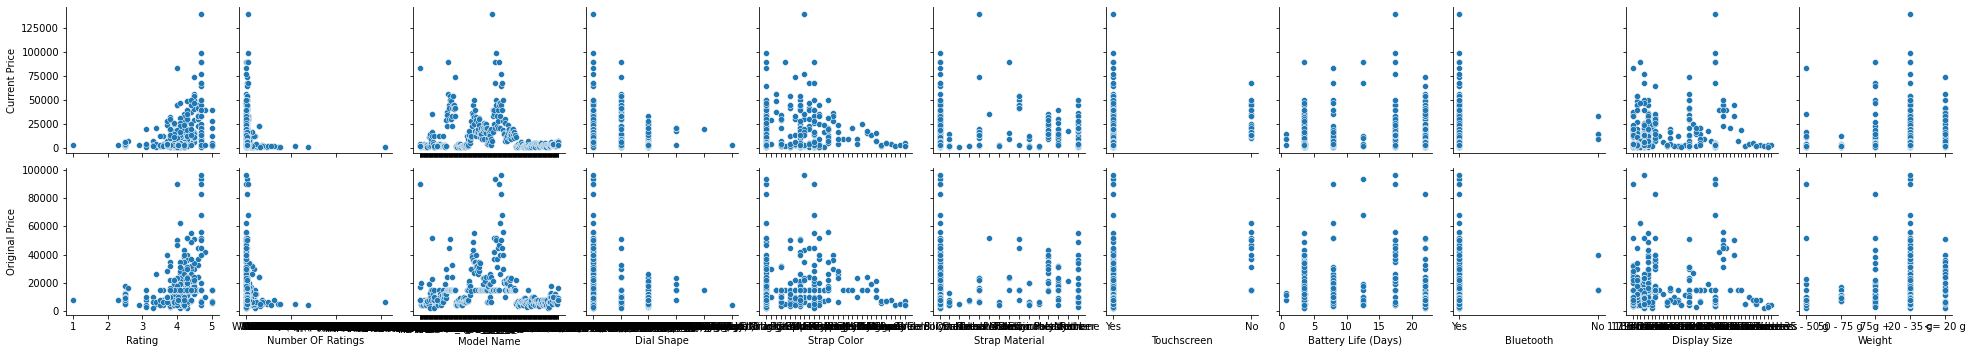

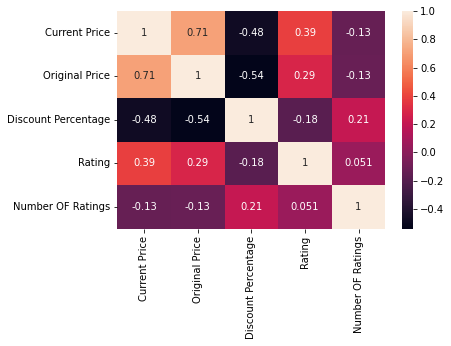

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

X = watch.drop(["Brand", "Current Price", "Original Price", "Discount Percentage"], axis = 1)
y = watch[["Current Price", "Original Price"]]

sns.pairplot(data=watch, x_vars=X.columns, y_vars=y.columns)
plt.show()

sns.heatmap(watch.corr(), annot=True)
plt.show()

From the above heatmap and pairplot, it is clearly evident that Prices and Discount Percentage have a Negative Correlation.
